In [ ]:
import numpy as np
from numpy import random
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv("perth_pro.csv")

In [ ]:
df.head()

,Unnamed: 0,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,...,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK,station_num,NEAREST_CEM_DIST
0,0,52 Graham Road,Gooseberry Hill,855000,3,2,2.0,2148,192,1976.0,...,7400,2018-01-01,6076,-31.942012,116.051851,TREETOPS MONTESSORI SCHOOL,3.231840,200.0,1.0,6650.114755
1,1,111 Willmott Drive,Cooloongup,270000,3,1,1.0,681,90,1988.0,...,1300,2018-01-01,6168,-32.301900,115.757760,SOUTH COAST BAPTIST COLLEGE,1.497308,54.0,9.0,3395.069164
2,2,12 Moreto Turn,Caversham,502500,4,2,2.0,474,189,NaN,...,3800,2018-01-01,6055,-31.864014,115.969749,GOVERNOR STIRLING SENIOR HIGH SCHOOL,3.305409,130.0,6.0,3937.034611
3,3,6 Finchley Rise,Mount Claremont,1780000,4,2,2.0,916,263,1991.0,...,1900,2018-01-01,6010,-31.963740,115.780730,JOHN XXIII COLLEGE,0.572773,8.0,15.0,1898.157528
4,4,32a Talbot Road,Swan View,428000,3,2,NaN,850,152,2010.0,...,5000,2018-01-01,6056,-31.882912,116.053054,SWAN VIEW SENIOR HIGH SCHOOL,0.967736,149.0,16.0,3867.178162


In [ ]:
df = df.fillna(0)
df = pd.DataFrame(df,columns = ["PRICE","BEDROOMS","BATHROOMS","GARAGE","LAND_AREA","BUILD_YEAR","FLOOR_AREA","CBD_DIST","NEAREST_SCH_RANK","NEAREST_STN_DIST","NEAREST_SCH_DIST","station_num","NEAREST_CEM_DIST"])

In [ ]:
df_coor=df.corr()
df_coor.head()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,BUILD_YEAR,FLOOR_AREA,CBD_DIST,NEAREST_SCH_RANK,NEAREST_STN_DIST,NEAREST_SCH_DIST,station_num,NEAREST_CEM_DIST
PRICE,1.000000,0.200302,0.328238,0.109050,0.019872,0.020304,0.556653,-0.390693,-0.373095,-0.125771,-0.023295,0.083554,-0.301247
BEDROOMS,0.200302,1.000000,0.550177,0.207400,0.019450,0.004391,0.539049,0.170643,0.034275,0.135051,0.079964,-0.202574,0.133839
BATHROOMS,0.328238,0.550177,1.000000,0.239564,0.014814,0.008041,0.552425,0.083922,-0.057241,0.079831,0.063576,-0.167020,0.083482
GARAGE,0.109050,0.207400,0.239564,1.000000,0.019239,-0.011518,0.188062,0.027685,0.020362,0.079618,0.067358,-0.089099,0.051821
LAND_AREA,0.019872,0.019450,0.014814,0.019239,1.000000,0.002027,0.026593,0.041817,0.003300,0.102151,0.111419,-0.064970,0.059685


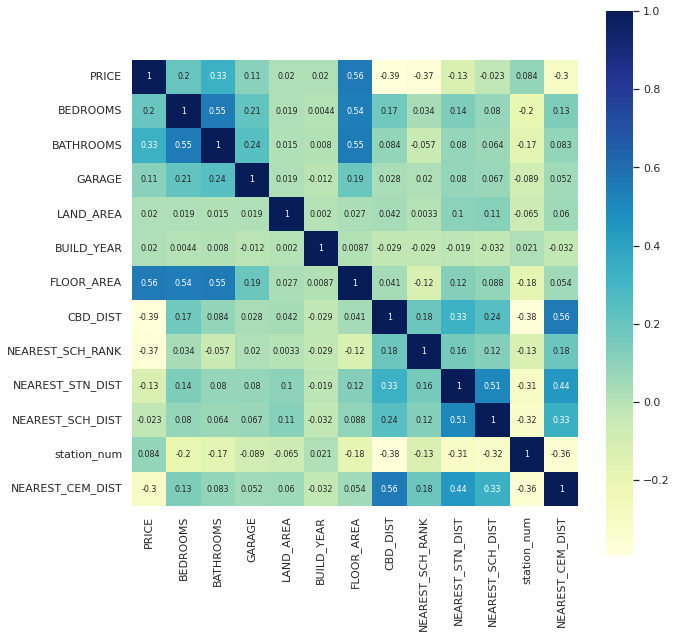

In [ ]:
plt.subplots(figsize=(10, 10))
p1 = sns.heatmap(df.corr(), annot=True, vmax=1, square=True, cmap="YlGnBu",annot_kws={"size":8})
s1 = p1.get_figure()
s1.savefig('HeatMap.jpg',dpi=300,bbox_inches='tight')

In [ ]:
plt.savefig('heatmap.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
df1 = df.drop(columns=["LAND_AREA","NEAREST_SCH_DIST","GARAGE","BUILD_YEAR","PRICE","station_num"])

In [ ]:
!pip install statsmodels==0.13.2

     |████████████████████████████████| 9.8 MB 31.1 MB/s 
     |████████████████████████████████| 233 kB 47.3 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df1.to_numpy(), i) for i in range(df1.to_numpy().shape[1])]
for i in range(len(df1.columns)):
    print("VIF of " + df1.columns[i] + ": " + str(vif[i]))

VIF of BEDROOMS: 27.6286707960787
VIF of BATHROOMS: 20.145791525274362
VIF of FLOOR_AREA: 13.862574216626719
VIF of CBD_DIST: 5.693585657283655
VIF of NEAREST_SCH_RANK: 3.7521915687098106
VIF of NEAREST_STN_DIST: 2.887266305855234
VIF of NEAREST_CEM_DIST: 5.103997586928939


In [ ]:
df1 = df1.drop('BEDROOMS',1)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
vif = [variance_inflation_factor(df1.to_numpy(), i) for i in range(df1.to_numpy().shape[1])]
for i in range(len(df1.columns)):
    print("VIF of " + df1.columns[i] + ": " + str(vif[i]))

VIF of BATHROOMS: 13.474573030508905
VIF of FLOOR_AREA: 11.292102294519639
VIF of CBD_DIST: 5.487650181281182
VIF of NEAREST_SCH_RANK: 3.3579396389850755
VIF of NEAREST_STN_DIST: 2.8862231557954168
VIF of NEAREST_CEM_DIST: 5.093892049230637


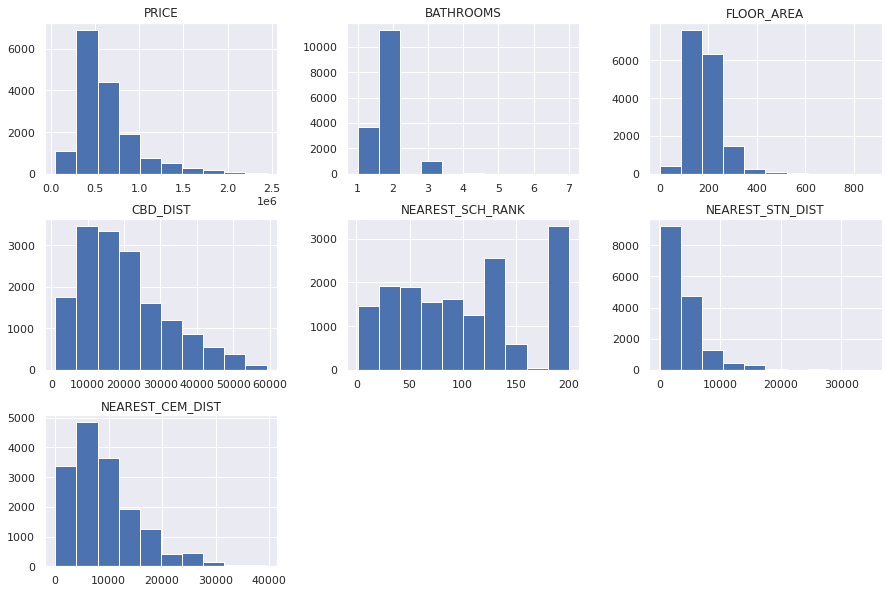

In [ ]:
df2 = pd.DataFrame(df,columns = ["PRICE","BATHROOMS","FLOOR_AREA","CBD_DIST","NEAREST_SCH_RANK","NEAREST_STN_DIST","NEAREST_CEM_DIST"])
df2.hist(figsize=(15, 10), color = sns.color_palette("deep", 1), layout=(3,3))
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7622d86f-bc43-4970-be08-1eec18806f26' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>